In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# calculate the mean
def fit_ncc(X,Y):
    # find unique classes
    cids = np.unique(Y)
    # compute class means
    mu = np.zeros((len(cids), X.shape[1]))
    for class_idx, class_label in enumerate(cids):
        mu[class_idx, :] = X[Y==class_label,:].mean(axis=0)
    return mu

# distance to the mean
def predict_ncc(X,mu): 
    # do nearest-centroid classification
    NCdist = np.zeros((X.shape[0], mu.shape[0]))
    # compute euclidean distance to centroids
    for icentroid in np.arange(mu.shape[0]):
        NCdist[:,icentroid] = np.sqrt(((X - mu[icentroid, :])**2).sum(axis=1))
    # assign the class label of the nearest (euclidean distance) centroid
    Y_predicted = NCdist.argmin(axis=1)
    return Y_predicted

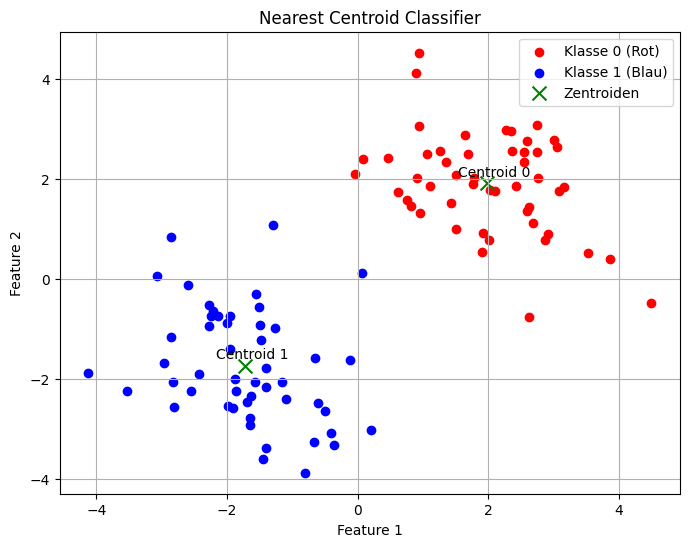

Genauigkeit: 100.00%


In [3]:
# Create Testdata
np.random.seed(22)
X_red = np.random.randn(50, 2) + np.array([2, 2])
X_blue = np.random.randn(50, 2) + np.array([-2, -2])
X = np.vstack((X_red, X_blue))
Y = np.hstack((np.zeros(50), np.ones(50)))

# Train the Nearest Centroid Classifier
mu = fit_ncc(X, Y)

# predict
Y_pred = predict_ncc(X, mu)

# create diagrams
plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='red', label='Klasse 0 (Rot)')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='blue', label='Klasse 1 (Blau)')
plt.scatter(mu[:, 0], mu[:, 1], color='green', marker='x', s=100, label='Zentroiden')
for i, txt in enumerate(mu):
    plt.annotate(f'Centroid {i}', (mu[i, 0], mu[i, 1]), textcoords="offset points", xytext=(5,5), ha='center')

plt.legend()
plt.title('Nearest Centroid Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# calculate accuracy
accuracy = np.mean(Y == Y_pred)
print(f"Genauigkeit: {accuracy * 100:.2f}%")

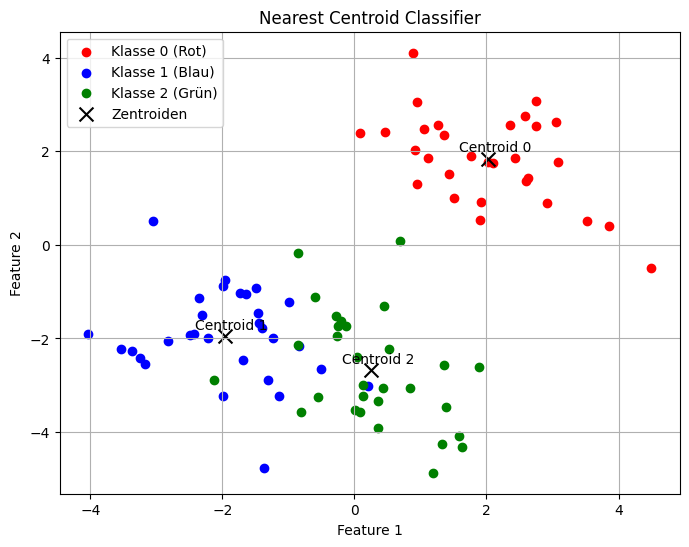

Genauigkeit: 90.00%


In [8]:
# Testdaten erstellen
np.random.seed(22)
X_red = np.random.randn(30, 2) + np.array([2, 2])  # Klasse 0 (Rot)
X_blue = np.random.randn(30, 2) + np.array([-2, -2])  # Klasse 1 (Blau)
X_green = np.random.randn(30, 2) + np.array([0, -3])  # Klasse 2 (Grün)
X = np.vstack((X_red, X_blue, X_green))
Y = np.hstack((np.zeros(30), np.ones(30), np.full(30, 2)))  # Labels für jede Klasse

# Nearest Centroid Classifier trainieren
mu = fit_ncc(X, Y)

# Vorhersagen treffen
Y_pred = predict_ncc(X, mu)

# Diagramm erstellen
plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='red', label='Klasse 0 (Rot)')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='blue', label='Klasse 1 (Blau)')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], color='green', label='Klasse 2 (Grün)')
plt.scatter(mu[:, 0], mu[:, 1], color='black', marker='x', s=100, label='Zentroiden')
for i, txt in enumerate(mu):
    plt.annotate(f'Centroid {i}', (mu[i, 0], mu[i, 1]), textcoords="offset points", xytext=(5,5), ha='center')

plt.legend()
plt.title('Nearest Centroid Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Genauigkeit berechnen
accuracy = np.mean(Y == Y_pred)
print(f"Genauigkeit: {accuracy * 100:.2f}%")


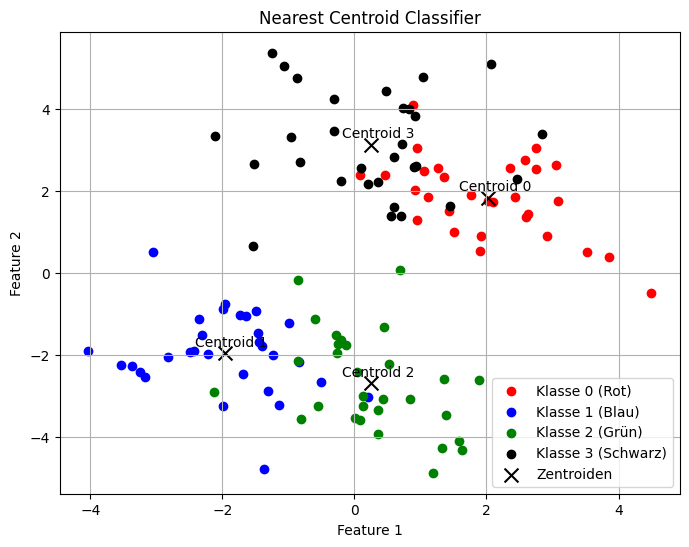

Genauigkeit: 82.50%


In [10]:
# Testdaten erstellen
np.random.seed(22)
X_red = np.random.randn(30, 2) + np.array([2, 2])
X_blue = np.random.randn(30, 2) + np.array([-2, -2])
X_green = np.random.randn(30, 2) + np.array([0, -3])
X_black = np.random.randn(30, 2) + np.array([0, 3])
X = np.vstack((X_red, X_blue, X_green, X_black))
Y = np.hstack((np.zeros(30), np.ones(30), np.full(30, 2), np.full(30, 3)))  # Labels für jede Klasse

# Nearest Centroid Classifier trainieren
mu = fit_ncc(X, Y)

# Vorhersagen treffen
Y_pred = predict_ncc(X, mu)

# Diagramm erstellen
plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='red', label='Klasse 0 (Rot)')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='blue', label='Klasse 1 (Blau)')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], color='green', label='Klasse 2 (Grün)')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], color='black', label='Klasse 3 (Schwarz)')
plt.scatter(mu[:, 0], mu[:, 1], color='black', marker='x', s=100, label='Zentroiden')
for i, txt in enumerate(mu):
    plt.annotate(f'Centroid {i}', (mu[i, 0], mu[i, 1]), textcoords="offset points", xytext=(5,5), ha='center')

plt.legend()
plt.title('Nearest Centroid Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Genauigkeit berechnen
accuracy = np.mean(Y == Y_pred)
print(f"Genauigkeit: {accuracy * 100:.2f}%")
